# Tutorial about filtering LocData objects

## Setting things up

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import surepy as sp

In [2]:
sp.show_versions(system=False, dependencies=False, verbose=False)


Surepy:
   version: 0.7.dev3+gb9aca40

Python:
   version: 3.8.8


### Sample data:

A random dataset is created.

In [3]:
dat = sp.simulate_Thomas(n_samples=1000, n_features=2, centers=10, feature_range=(0, 1000), cluster_std=10, seed=1)

print('')
dat.print_summary()


identifier: "1"
comment: ""
creation_date: "2021-03-04 13:46:48 +0100"
modification_date: ""
source: SIMULATION
state: RAW
element_count: 1000
frame_count: 0
file_type: UNKNOWN_FILE_TYPE
file_path: ""



### Show scatter plots

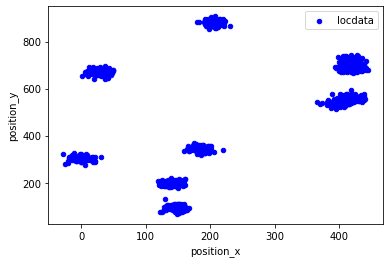

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1)
dat.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='locdata')
plt.show()

## Select localizations according to property conditions

A LocData object carries localization data with certain properties for each localization.

We can select localisations according to property conditions.

In [5]:
dat_select = sp.select_by_condition(dat, condition='position_x<200')

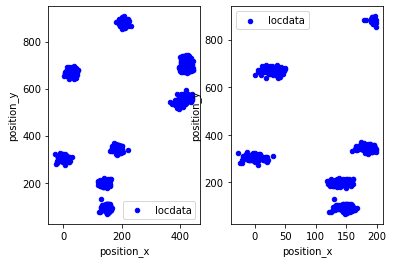

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2)
dat.data.plot.scatter(x='position_x', y='position_y', ax=ax[0], color='Blue', label='locdata')
dat_select.data.plot.scatter(x='position_x', y='position_y', ax=ax[1], color='Blue', label='locdata')
plt.tight_layout
plt.show()

## Select a random subset of localizations

In [7]:
dat_random = sp.random_subset(dat, n_points=10)

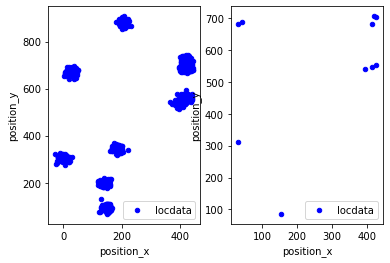

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2)
dat.data.plot.scatter(x='position_x', y='position_y', ax=ax[0], color='Blue', label='locdata')
dat_random.data.plot.scatter(x='position_x', y='position_y', ax=ax[1], color='Blue', label='locdata')
plt.tight_layout
plt.show()

## Select localizations from a region of interest

Define a region of interest (roi):

In [9]:
roi = sp.Roi(reference=dat, region_specs=((1, 1), 400, 400, 0), region_type='rectangle')

Create new LocData instance by selecting localizations within a roi.

In [10]:
dat_roi = roi.locdata()

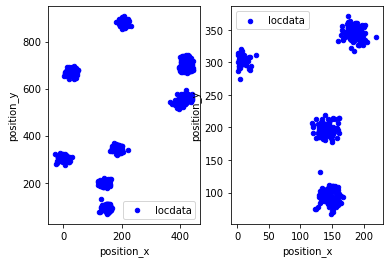

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2)
dat.data.plot.scatter(x='position_x', y='position_y', ax=ax[0], color='Blue', label='locdata')
dat_roi.data.plot.scatter(x='position_x', y='position_y', ax=ax[1], color='Blue', label='locdata')
plt.tight_layout
plt.show()

Alternatively use the select_by_region function, which ignores the reference given in the Roi object. 

In [12]:
region = sp.RoiRegion(region_specs=((1, 1), 400, 400, 0), region_type='rectangle')
dat_roi = sp.select_by_region(dat, region=region)

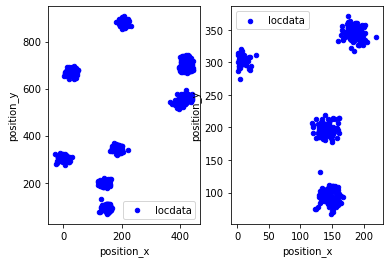

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2)
dat.data.plot.scatter(x='position_x', y='position_y', ax=ax[0], color='Blue', label='locdata')
dat_roi.data.plot.scatter(x='position_x', y='position_y', ax=ax[1], color='Blue', label='locdata')
plt.tight_layout
plt.show()

### ROI input/output

If you have prepared rois and saved them as roi.yaml file you can read that data back in:

In [14]:
roi

Roi(reference=<surepy.data.locdata.LocData object at 0x00000279275318E0>, region_type=rectangle, region_specs=((1, 1), 400, 400, 0), properties_for_roi=())

In [15]:
import tempfile
from pathlib import Path

with tempfile.TemporaryDirectory() as tmp_directory:
    file_path = Path(tmp_directory) / 'roi.yaml'

    # roi = Roi(region_specs=((0, 0), 2, 1, 10), region_type='rectangle')
    roi.to_yaml(path=file_path)

    roi_new = sp.Roi.from_yaml(path = file_path)
    roi_new.reference = roi.reference

dat_1 = roi_new.locdata()
dat_1.meta

c:\users\soeren\mydata\programming\python\projects\surepy\surepy\data\rois.py:251: UserWarning: The localization data has to be saved and the file path provided, or the reference is lost.
  warnings.warn('The localization data has to be saved and the file path provided, '


identifier: "7"
creation_date: "2021-03-04 13:46:48 +0100"
modification_date: "2021-03-04 13:46:48 +0100"
source: SIMULATION
state: MODIFIED
history {
  name: "simulate_Thomas"
  parameter: "{\'n_samples\': 1000, \'n_features\': 2, \'centers\': 10, \'cluster_std\': 10, \'feature_range\': (0, 1000), \'shuffle\': True, \'seed\': 1}"
}
history {
  name: "locdata"
  parameter: "{\'self\': Roi(reference=<surepy.data.locdata.LocData object at 0x00000279275318E0>, region_type=rectangle, region_specs=[[1.0, 1.0], 400.0, 400.0, 0.0], properties_for_roi=[]), \'reduce\': True}"
}
ancestor_identifiers: "1"
element_count: 344
frame_count: 0